In [1]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from string import Template
import os
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import fire

C:\Users\ronny\anaconda3\envs\fire\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
from send_email import extract_contacts

In [3]:
extract_contacts(contact_file='templates/contacts.txt')

(['Team Algoritma one', 'Ronny Raharjo two'],
 ['mentor@algorit.ma', 'ronnyrj2000@gmail.com'])

In [4]:
fb = pd.read_csv('data_input/data.csv')

In [5]:
id= ['936','1178']

In [6]:
fb = fb[fb['campaign_id'].isin(id)]
fb = fb[fb.spent > 0]

In [7]:
fb.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

In [8]:
fb[['reporting_start', 'reporting_end']] = fb[['reporting_start', 'reporting_end']].astype('datetime64')

In [9]:
fb.dtypes

ad_id                           int64
reporting_start        datetime64[ns]
reporting_end          datetime64[ns]
campaign_id                    object
fb_campaign_id                 object
age                            object
gender                         object
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
dtype: object

In [10]:
start_date = fb['reporting_start'].min().strftime(format="%d %b %Y")
start_date

'18 Aug 2017'

In [11]:
end_date = fb['reporting_start'].max().strftime(format="%d %b %Y")
end_date

'30 Aug 2017'

In [12]:
fb.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.63,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.84,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.04,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.46,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.84,1.0,1.0


In [13]:
total_spent = int(fb['spent'].sum())
total_spent

19470

In [14]:
total_conversion = int(fb['total_conversion'].sum())
total_conversion

1398

In [15]:
cpc = fb.groupby(['campaign_id'])[['spent', 'total_conversion']].sum()
cpc

,spent,total_conversion
campaign_id,,
1178,16577.159998,1042.0
936,2893.369999,356.0


In [16]:
cpc['CPC'] = cpc['spent']/cpc['total_conversion']

In [17]:
cpc

,spent,total_conversion,CPC
campaign_id,,,
1178,16577.159998,1042.0,15.908983
936,2893.369999,356.0,8.127444


In [18]:
from send_email import extract_summary

In [19]:
extract_summary()

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [20]:
data_dict = extract_summary()
data_dict

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [21]:
data_dict['start_date']

'18 Aug 2017'

In [22]:
import os
print(os.environ['EMAIL_ADDRESS'])
print(os.environ['EMAIL_PASSWORD'])

KeyError: 'EMAIL_ADDRESS'

In [23]:
from send_email import authenticate_account

In [24]:
  s = authenticate_account(EMAIL=os.environ['EMAIL_ADDRESS'], \
    PASSWORD=os.environ['EMAIL_PASSWORD'])

KeyError: 'EMAIL_ADDRESS'

In [25]:
fb = pd.read_csv("data_input/data.csv", parse_dates=[1,2])

In [26]:
id=['936', '1178']

In [27]:
campaigns = fb[fb['campaign_id'].isin(id)]

In [28]:
campaigns = campaigns[campaigns.spent > 0]

In [29]:
campaigns

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.630000,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.840000,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.040000,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.460000,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.840000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,2017-08-20,2017-08-20,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [30]:
grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

In [31]:
grouped.head()

,campaign_id,age,reporting_start,total_conversion
0,1178,30-34,2017-08-19,33.0
1,1178,30-34,2017-08-20,38.0
2,1178,30-34,2017-08-21,24.0
3,1178,30-34,2017-08-22,56.0
4,1178,30-34,2017-08-23,135.0


In [32]:
fig = plt.figure(1, figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

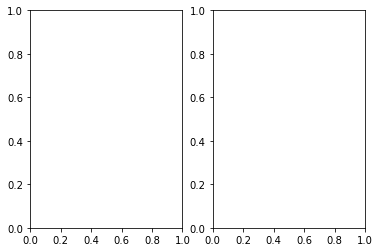

In [33]:
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)

In [34]:
df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]

In [35]:
df.head()

,age,reporting_start,total_conversion
28,30-34,2017-08-18,11.0
29,30-34,2017-08-19,15.0
30,30-34,2017-08-20,13.0
31,30-34,2017-08-21,8.0
32,30-34,2017-08-22,19.0


In [36]:
df['reporting_start'] = df['reporting_start'].dt.date

In [37]:
pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)

In [38]:
pivot

age,30-34,35-39,40-44,45-49
reporting_start,,,,
2017-08-18,11.0,10.0,2.0,16.0
2017-08-19,15.0,10.0,15.0,3.0
2017-08-20,13.0,10.0,2.0,10.0
2017-08-21,8.0,5.0,6.0,21.0
2017-08-22,19.0,3.0,6.0,10.0
2017-08-23,14.0,5.0,9.0,10.0
2017-08-24,13.0,4.0,1.0,5.0
2017-08-25,8.0,1.0,5.0,6.0
2017-08-26,5.0,0.0,4.0,17.0


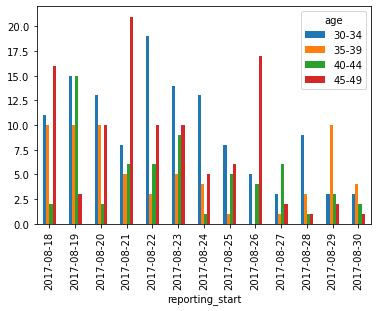

In [39]:
pivot.plot.bar(ax=plt.gca())

In [40]:
def create_plot(file_path="data_input/data.csv", id=['936', '1178']):
  """   
  Fetch data from data source and export as plot
  """
  fb = pd.read_csv(file_path, parse_dates=[1,2])
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Create a grouped dataframe based on campaign id, age group, and reporting date
  # Calculate the total converision of each group
  grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

  fig = plt.figure(1, figsize=(15,6))

  # Iterate to create 1 plot campaign at a time
  for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())

  fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
  fig.autofmt_xdate()

  # Save file to plot folder
  imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
  fig.savefig(imagename)
  return(imagename)

In [41]:
create_plot

<function __main__.create_plot(file_path='data_input/data.csv', id=['936', '1178'])>

In [42]:
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'

In [43]:
imagename

'plot/14 May 2020.png'

In [44]:
fig.savefig(imagename)